In [1]:
# author: "James Haberberger"
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import seaborn as sns

In [2]:
adata = ad.AnnData(pd.read_csv('/hpc/projects/group.quake/doug/bulk_seq/sorted_Microglia_bulk.csv').set_index("Unnamed: 0").T)
adata.obs["age"] = [str(x.split("_")[1].split("x")[0]) for x in adata.obs.index]
adata.obs["region"] = [x.split("_")[2] for x in adata.obs.index]
adata.X = csr_matrix(adata.X.astype(float))

In [3]:
adata.layers["raw"] = adata.X.copy()

In [4]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
adata.obsm["X_PCA"] = pca.fit_transform(adata.X.toarray())

In [6]:
adata.obs["PC1"] = adata.obsm["X_PCA"][:, 0]
adata.obs["PC2"] = -adata.obsm["X_PCA"][:, 1]

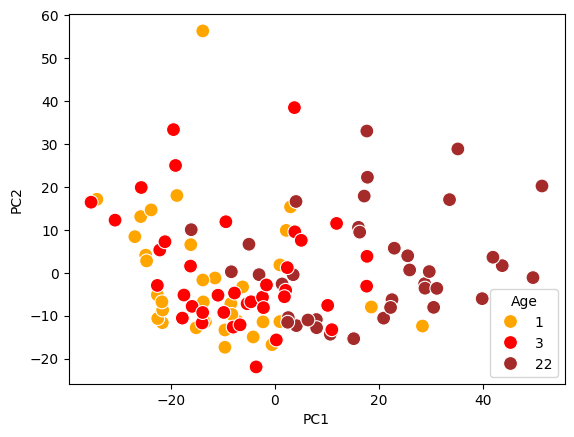

In [7]:
palette = {
    "1": "orange",
    "3": "red",
    "22": "brown"
}
adata.obs["Age"] = adata.obs["age"].astype(float)

sns.scatterplot(data=adata.obs, x="PC1", y="PC2", hue="age", palette=palette, hue_order=["1", "3", "22"], s=100)
plt.legend(title="Age", loc=4)
plt.savefig("Microglia-Age.pdf")

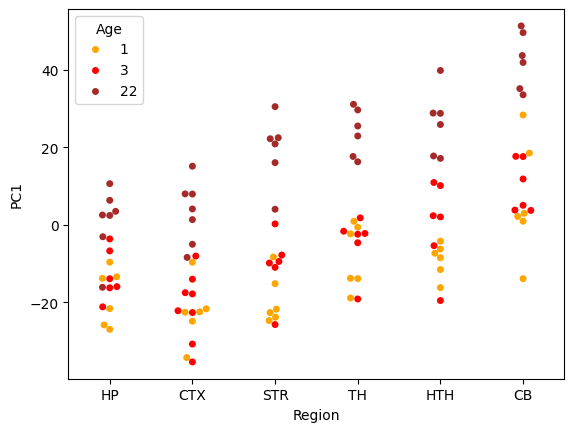

In [8]:
sns.swarmplot(data=adata.obs, x="region", y="PC1", hue="age", palette=palette, hue_order=["1", "3", "22"], order=["HP", "CTX", "STR", "TH", "HTH", "CB"], s=5).set(xlabel="Region", ylabel="PC1")
plt.legend(title="Age")
plt.savefig("Microglia-Region.pdf")